In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import *

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Viena užduotis maždaug
# vienai paskaitai. Techniniai reikalavimai –
# Jupyter Notebook’as arba Streamlit aplinka. Grafikai turi turėti
# pavadinimus, ašys pavadintos prasmingai, jei grafike yra daugiau nei
# viena kreivė – legenda būtina. Panaudoti boxplot,
# swarmplot, heatmap, pairplot, (h)bar,
# histogram, scatter. Būtina pasirašyti 1 – 2
# sakinius į JupyterNotebook’ą apie tai, ką matote, ką galite
# pasakyti iš grafiko (ką matote grafike, 1-2 sakiniai vienam
# grafikui, tad jei turėsite 10 grafikų – 20 sakinių).

#  5        
      

# Duomenys:
# https://data.gov.lt/datasets/2829/
# - Stacionaro ir ambulatoriniai ligoniai, gydyti nuo traumų ir
# apsinuodijimų. Įvertinkite patiriamų traumų, apsinuodijimų
# dažnius/pasiskirstymą, sunkumą pagal amžių/amžiaus
# grupes, lytį, paros, metų, darbo dienų/švenčių/išeiginių. Ar
# traumų pobūdis/dažnis, apsinuodijimų kiekis, pobūdis, sunkumas
# priklauso nuo užfiksuotų meteorologinių sąlygų, mėnulio fazės,
# švenčių/laisvadienių?
# Duomenys:
# https://data.gov.lt/datasets/2793/#info
# – PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
# – Policijos
# iškvietimai. Ar
# iškvietimų dažnis/kiekis priklauso nuo paros,
# metų, darbo dienų/švenčių/išeiginių, mėnulio
# fazės, švenčių/laisvadienių?
# Mėnulio
# fazės turi būti pasiekiamos per http užklausas – iš esmės
# pasinaudojate web scrapingu, kad gautumėte norimą informaciją.
# Papildoma informacija -
# https://ligoniukasa.lrv.lt/lt/veiklos-sritys/informacija-gyventojams/gydymo-ir-sveikatos-prieziuros-paslaugos/stebejimo-paslaugos/
# ;





# https://astropixels.com/ephemeris/phasescat/phasescat.html

In [3]:
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver # naršyklės kontroleris
from selenium.webdriver.chrome.options import Options #Naršyklės
# pip install beautifulsoup4 selenium
import time


In [4]:
opcijos = Options()
opcijos.add_argument('--incognito')
driver = webdriver.Chrome(options=opcijos)
url = 'https://astropixels.com/ephemeris/phasescat/phases2001.html'
driver.get(url)
time.sleep(5)
source = driver.page_source
driver.close()

In [5]:
bs = BeautifulSoup(source, 'html.parser')

In [6]:

sk = bs.find_all('div', {'class': 'pbox1a'})[2].text
sk1 = bs.find_all('div', {'class': 'pbox1a'})[1].text
sk0 = bs.find_all('div', {'class': 'pbox1a'})[0].text
print(sk0)





Phases of the Moon: 2001 to 2010Universal Time (UT)
 Year      New Moon       First Quarter       Full Moon       Last Quarter 
 2001                     Jan  2  22:31     Jan  9  20:24 t   Jan 16  12:35    
        Jan 24  13:07     Feb  1  14:02     Feb  8  07:12     Feb 15  03:24    
        Feb 23  08:21     Mar  3  02:03     Mar  9  17:23     Mar 16  20:45    
        Mar 25  01:21     Apr  1  10:49     Apr  8  03:22     Apr 15  15:31    
        Apr 23  15:26     Apr 30  17:08     May  7  13:53     May 15  10:11    
        May 23  02:46     May 29  22:09     Jun  6  01:39     Jun 14  03:28    
        Jun 21  11:58 T   Jun 28  03:20     Jul  5  15:04 p   Jul 13  18:45    
        Jul 20  19:44     Jul 27  10:08     Aug  4  05:56     Aug 12  07:53    
        Aug 19  02:55     Aug 25  19:55     Sep  2  21:43     Sep 10  19:00    
        Sep 17  10:27     Sep 24  09:31     Oct  2  13:49     Oct 10  04:20    
        Oct 16  19:23     Oct 24  02:58     Nov  1  05:41     Nov  8  1

In [7]:
import pandas as pd
import io

df = pd.read_fwf(io.StringIO(sk), header=1)
df1 = pd.read_fwf(io.StringIO(sk1), header=1)
df0 = pd.read_fwf(io.StringIO(sk0), header=1)

In [8]:
df = df.drop(columns=['Unnamed: 4'])
df1 = df1.drop(columns=['Unnamed: 4'])
df0 = df0.drop(columns=['Unnamed: 4'])

In [78]:
df1

,Year,New Moon,First Quarter,Full Moon,Last Quarter
0,2011,Jan 4 09:03 P,Jan 12 11:31,Jan 19 21:21,Jan 26 12:57
1,NaN,Feb 3 02:31,Feb 11 07:18,Feb 18 08:36,Feb 24 23:26
2,NaN,Mar 4 20:46,Mar 12 23:45,Mar 19 18:10,Mar 26 12:07
3,NaN,Apr 3 14:32,Apr 11 12:05,Apr 18 02:44,Apr 25 02:47
4,NaN,May 3 06:51,May 10 20:33,May 17 11:09,May 24 18:52
...,...,...,...,...,...
135,NaN,Aug 19 02:42,Aug 25 17:58,Sep 2 05:22,Sep 10 09:26
136,NaN,Sep 17 11:00,Sep 24 01:55,Oct 1 21:05,Oct 10 00:40
137,NaN,Oct 16 19:31,Oct 23 13:23,Oct 31 14:49,Nov 8 13:46
138,NaN,Nov 15 05:07,Nov 22 04:45,Nov 30 09:30,Dec 8 00:37


In [107]:
df2011 = df1.iloc[0:13, :]; df2011["Year"] = df2011["Year"].fillna(2011)
df2012 = df1.iloc[14:27, :]; df2012["Year"] = df2012["Year"].fillna(2012)
df2013 = df1.iloc[28:41, :]; df2013["Year"] = df2013["Year"].fillna(2013)
df2014 = df1.iloc[42:55, :]; df2014["Year"] = df2014["Year"].fillna(2014)
df2015 = df1.iloc[56:69, :]; df2015["Year"] = df2015["Year"].fillna(2015)
df2016 = df1.iloc[70:84, :]; df2016["Year"] = df2016["Year"].fillna(2016)
df2017 = df1.iloc[85:98, :]; df2017["Year"] = df2017["Year"].fillna(2017)
df2018 = df1.iloc[99:112, :]; df2018["Year"] = df2018["Year"].fillna(2018)
df2019 = df1.iloc[113:126, :]; df2019["Year"] = df2019["Year"].fillna(2019)
df2020 = df1.iloc[127:140, :]; df2020["Year"] = df2020["Year"].fillna(2020)

In [110]:
df2020

,Year,New Moon,First Quarter,Full Moon,Last Quarter
127,2020,NaN,Jan 3 04:45,Jan 10 19:21,Jan 17 12:58
128,2020,Jan 24 21:42,Feb 2 01:42,Feb 9 07:33,Feb 15 22:17
129,2020,Feb 23 15:32,Mar 2 19:57,Mar 9 17:48,Mar 16 09:34
130,2020,Mar 24 09:28,Apr 1 10:21,Apr 8 02:35,Apr 14 22:56
131,2020,Apr 23 02:26,Apr 30 20:38,May 7 10:45,May 14 14:03
132,2020,May 22 17:39,May 30 03:30,Jun 5 19:12,Jun 13 06:24
133,2020,Jun 21 06:41 A,Jun 28 08:16,Jul 5 04:44,Jul 12 23:29
134,2020,Jul 20 17:33,Jul 27 12:32,Aug 3 15:59,Aug 11 16:45
135,2020,Aug 19 02:42,Aug 25 17:58,Sep 2 05:22,Sep 10 09:26
136,2020,Sep 17 11:00,Sep 24 01:55,Oct 1 21:05,Oct 10 00:40


In [10]:
df2021 = df.iloc[0:13, :]; df2021["Year"] = df2021["Year"].ffill().astype(int)
df2022 = df.iloc[14:27, :]; df2022["Year"] = df2022["Year"].ffill().astype(int)
df2023 = df.iloc[28:41, :]; df2023["Year"] = df2023["Year"].ffill().astype(int)
df2024 = df.iloc[42:56, :]; df2024["Year"] = df2024["Year"].ffill().astype(int)
df2025 = df.iloc[57:70, :]; df2025["Year"] = df2025["Year"].ffill().astype(int)


In [111]:
mėnulis = pd.concat([df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022, df2023, df2024, df2025], axis=0)

In [ ]:
mėnulis

,Year,New Moon,First Quarter,Full Moon,Last Quarter
0,2011,Jan 4 09:03 P,Jan 12 11:31,Jan 19 21:21,Jan 26 12:57
1,2011,Feb 3 02:31,Feb 11 07:18,Feb 18 08:36,Feb 24 23:26
2,2011,Mar 4 20:46,Mar 12 23:45,Mar 19 18:10,Mar 26 12:07
3,2011,Apr 3 14:32,Apr 11 12:05,Apr 18 02:44,Apr 25 02:47
4,2011,May 3 06:51,May 10 20:33,May 17 11:09,May 24 18:52
...,...,...,...,...,...
65,2025,Aug 23 06:06,Aug 31 06:25,Sep 7 18:09,Sep 14 10:33
66,2025,Sep 21 19:54 P,Sep 29 23:54,Oct 7 03:48,Oct 13 18:13
67,2025,Oct 21 12:25,Oct 29 16:21,Nov 5 13:19,Nov 12 05:28
68,2025,Nov 20 06:47,Nov 28 06:59,Dec 4 23:14,Dec 11 20:52


In [121]:
import pandas as pd
import re

def transform_moon_data(df):
    df_melted = df.melt(id_vars=['Year'], var_name='moon_phase', value_name='datetime')
    
    df_melted['datetime'] = df_melted.apply(lambda row: f"{row['Year']} {row['datetime']}", axis=1)
    
    df_melted['datetime'] = df_melted['datetime'].apply(lambda x: re.sub(r'(\d{2}:\d{2})\s*[A-Za-z]*', r'\1', x))

    df_melted['datetime'] = pd.to_datetime(df_melted['datetime'], format='%Y %b %d %H:%M', errors='coerce')
    
    df_melted.drop(columns=['Year'], inplace=True)
    
    return df_melted


In [122]:
mėnulis_for_check = transform_moon_data(mėnulis)

In [132]:
mėnulis_for_check

,moon_phase,datetime,Data
0,New Moon,2011-01-04 09:03:00,2011-01-04
1,New Moon,2011-02-03 02:31:00,2011-02-03
2,New Moon,2011-03-04 20:46:00,2011-03-04
3,New Moon,2011-04-03 14:32:00,2011-04-03
4,New Moon,2011-05-03 06:51:00,2011-05-03
...,...,...,...
782,Last Quarter,2025-08-16 05:12:00,2025-08-16
783,Last Quarter,2025-09-14 10:33:00,2025-09-14
784,Last Quarter,2025-10-13 18:13:00,2025-10-13
785,Last Quarter,2025-11-12 05:28:00,2025-11-12


In [171]:

def fill_moon_phases(df):
    # Rikiuojame pagal datą
    df = df.sort_values(by='Data').reset_index(drop=True)

    # Sukuriame pilną datų intervalą
    all_dates = pd.DataFrame({'Data': pd.date_range(df['Data'].min(), df['Data'].max()).date})

    # Merginame lenteles pagal datą
    merged = all_dates.merge(df[['Data', 'moon_phase']], on='Data', how='left')

    # Užpildome tuščias reikšmes naudojant paskutinę galimą vertę
    merged['moon_phase'] = merged['moon_phase'].fillna(method='ffill')

    return merged

# Pritaikome funkciją
mėnulis_for_check = fill_moon_phases(mėnulis_for_check)


In [173]:
mėnulis_for_check['Data'] = pd.to_datetime(mėnulis_for_check['Data'])

In [176]:
from datetime import datetime
mėnulis_for_check = mėnulis_for_check.dropna()
mėnulis_for_check['Data'] = mėnulis_for_check['Data'].dt.date
mėnulis_for_check['Mėnulio padėtis'] = mėnulis_for_check['moon_phase'].apply(lambda x: 'Jaunatis' if x == 'New Moon' else 'Priešpilnis' if x == 'First Quarter' else 'Pilnatis' if x == 'Full Moon' else 'Delčia')

In [11]:
# https://day.lt/diena/2021.04.22

In [321]:
import requests
from bs4 import BeautifulSoup

def is_working_day(date):
    weekday = date.weekday()
    url = f'https://day.lt/diena/{date.year}.{date.month:02d}.{date.day:02d}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    


    if weekday > 4:
        return False
    else:
        try:
            soup.find('div', {'class': 'text-center mb-8'}).find('a')['style']
            return False
        except:
            return True



In [189]:
pacientai = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/85/Pacientas.csv')
ivykiai = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/85/Ivykis.csv')
ligonines_check = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/85/Ligonine.csv')
klasif = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python projektai/85/1(9).xlsx')

In [13]:
klasif.columns

Index(['TLK-10-AM Kodas', 'TLK-10-AM Kodo pavadinimas', 'Kodo lygis',
       'Žvaigždutė', 'Apskritimas', 'Kryželis', 'Poskyrio eil. nr.',
       'Poskyrio blokas', 'Poskyrio pavadinimas', 'Skyriaus nr.',
       'Skyriaus blokas', 'Skyriaus pavadinimas', 'Data nuo', 'Data iki'],
      dtype='object')

In [14]:
klasifikatoriai = klasif[['TLK-10-AM Kodas','TLK-10-AM Kodo pavadinimas','Skyriaus pavadinimas', 'Poskyrio pavadinimas']]

In [177]:
pacientai_check = pacientai
pacientai_check['Trauma'] = pacientai_check['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['TLK-10-AM Kodo pavadinimas'])
pacientai_check['Skyrius'] = pacientai_check['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['Skyriaus pavadinimas'])
pacientai_check['Poskyris'] = pacientai_check['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['Poskyrio pavadinimas'])
pacientai_check['Aplinkybė'] = pacientai_check['tlk_aplinkybe'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['TLK-10-AM Kodo pavadinimas'])
pacientai_check['Veikla'] = pacientai_check['tlk_veikla'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['TLK-10-AM Kodo pavadinimas'])
pacientai_check['Vieta'] = pacientai_check['tlk_vieta'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['TLK-10-AM Kodo pavadinimas'])
pacientai_check = pacientai_check[['gyd_lap_pradzia','lytis', 'vda_gim_metai', 'savivaldybe', 'gyvenviete', 'gydymas', 'Trauma', 'Aplinkybė', 'Veikla', 'Vieta', 'Skyrius', 'Poskyris']]
pacientai_check['Data'] = pd.to_datetime(pacientai_check['gyd_lap_pradzia'])
pacientai_check['Gimimo data'] = pd.to_datetime(pacientai_check['vda_gim_metai'])
pacientai_check = pacientai_check.drop(columns = ['gyd_lap_pradzia','vda_gim_metai'])
pacientai_check['Amžius'] = pacientai_check['Data'].dt.year - pacientai_check['Gimimo data'].dt.year
pacientai_check['Metai'] = pacientai_check['Data'].dt.year
pacientai_check['Mėnuo'] = pacientai_check['Data'].dt.month
pacientai_check['Amžiaus grupė'] = pd.cut(pacientai_check['Amžius'], bins=[0, 18, 65, 100], labels=['Vaikai', 'Darbingo amžiaus', 'Senyvo amžiaus'])
pacientai_check['Mėnulio padėtis'] = pacientai_check['Data'].map(mėnulis_for_check.set_index('Data')['Mėnulio padėtis'])    

In [178]:
pacientai_for_check = pacientai_check[pacientai_check['Skyrius'] == 'SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORINIŲ POVEIKIŲ PADARINIAI']

In [179]:
def apsinuod(x):
    if 'Apsinuod' in x:
        return 'Apsinuodijimas'
    else:
        return 'Trauma'

In [180]:
pacientai_for_check['Rūšis'] = pacientai_for_check['Trauma'].apply(apsinuod)

In [70]:
pacientai_for_check

,lytis,savivaldybe,gyvenviete,gydymas,Trauma,Aplinkybė,Veikla,Vieta,Skyrius,Poskyris,Data,Gimimo data,Amžius,Metai,Mėnuo,Amžiaus grupė,Paros metas,Rūšis
0,Vyras,Kretingos r. sav.,Nežinoma,Ambulatorinis,Žastikaulio viduriniojo krumplio lūžis,NaN,NaN,NaN,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",PETIES IR ŽASTO SUŽALOJIMAI,2013-01-01,1998-01-01,15.0,2013,1,Vaikai,Naktis,Trauma
1,Vyras,Vilniaus r. sav.,Kaimas,Ambulatorinis,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,Atsitrenkimas į kitus objektus ar smūgis jais,Kitas patikslintas nardymas,Ramaus vandens zona,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",KAKLO SUŽALOJIMAI,2022-08-01,1973-01-01,49.0,2022,8,Darbingo amžiaus,Naktis,Trauma
2,Moteris,Joniškio r. sav.,Miestas,Ambulatorinis,"Riešo patempimas, dalis nepatikslinta",Kritimas tame pačiame lygyje paslydus,Nepatikslinta veikla,Nepatikslinta įvykio vieta,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,2018-02-01,1960-01-01,58.0,2018,2,Darbingo amžiaus,Naktis,Trauma
3,Vyras,Švenčionių r. sav.,Miestas,Stacionarinis,Dviejų ar daugiau pirštų trauminė amputacija (...,Kontaktas su kitais patikslintais varikliniais...,Kitokio tipo darbas:,Kitos ir nepatikslintos vietos namuose,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,2015-08-01,1978-01-01,37.0,2015,8,Darbingo amžiaus,Naktis,Trauma
4,Vyras,Vilniaus m. sav.,Miestas,Ambulatorinis,"Svetimkūnis virškinimo trakte, dalis nepatiksl...","Svetimkūnis, patekęs į vidų per akį ar natūral...",NaN,Nepatikslinta įvykio vieta,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...","SVETIMKŪNIŲ, PATEKUSIŲ PRO NATŪRALIAS ANGAS, P...",2015-10-01,2011-01-01,4.0,2015,10,Vaikai,Naktis,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731501,Vyras,Visaginas,Miestas,Ambulatorinis,"Stipinkaulio apatinės dalies lūžis, nepatiksli...",Kritimas tame pačiame lygyje užkliuvus,Kita patikslinta veikla,Kita patikslinta įvykio vieta,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",ALKŪNĖS IR DILBIO SUŽALOJIMAI,2021-04-01,2011-01-01,10.0,2021,4,Vaikai,Naktis,Trauma
3731502,Vyras,Jonavos r. sav.,Miestas,Ambulatorinis,Nosies kaulų lūžis,NaN,NaN,NaN,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",GALVOS SUŽALOJIMAI,2014-08-01,1992-01-01,22.0,2014,8,Darbingo amžiaus,Naktis,Trauma
3731503,Moteris,Vilniaus m. sav.,Miestas,Ambulatorinis,"Kojos piršto (-ų) sumušimas, kai nagas nepažei...",Kritimas tame pačiame lygyje suklupus,Nepatikslinta veikla,Nepatikslinta įvykio vieta,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",ČIURNOS IR PĖDOS SUŽALOJIMAI,2015-08-01,1992-01-01,23.0,2015,8,Darbingo amžiaus,Naktis,Trauma
3731504,Moteris,Vilniaus m. sav.,Nežinoma,Ambulatorinis,Nepatikslinta alergija,Nenuodingų vabzdžių ir kitų nenuodingų nariuot...,Nepatikslinta veikla,Lauko zonos,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",KITI IR NEPATIKSLINTI IŠORINIŲ PRIEŽASČIŲ POVE...,2023-09-01,2022-01-01,1.0,2023,9,Vaikai,Naktis,Trauma


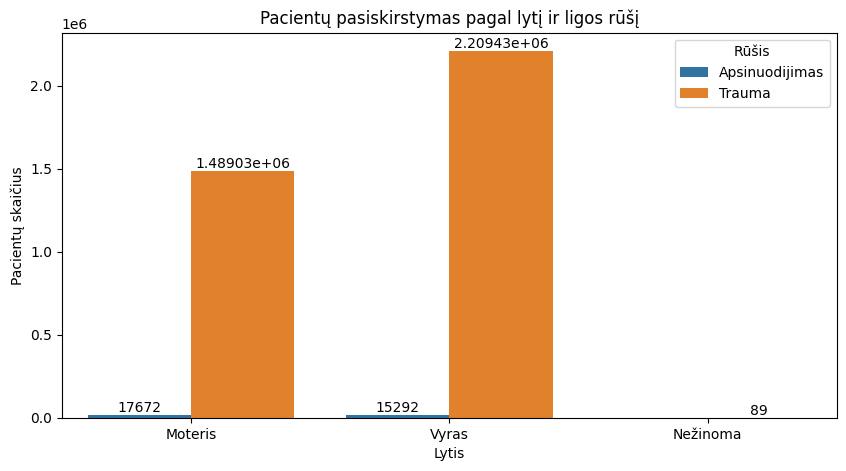

In [20]:
df_for_plots = pacientai_for_check.groupby(['Rūšis', 'lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='lytis', y='gydymas', data=df_for_plots, ax=ax, hue='Rūšis')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir ligos rūšį')
ax.set_xlabel('Lytis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [21]:
# Pastebėjimai
# 1. Daugiau moterų serga apsinuodijimais nei vyrai
# 2. Daugiau vyrai serga traumomis nei moterys
# 3. Daugiau traumų ir apsinuodijimų patiria Vyrai nei moterys

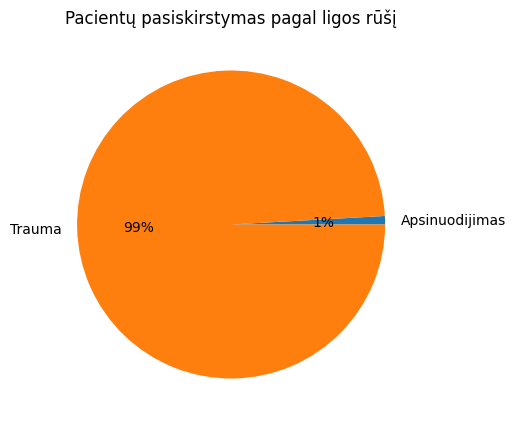

In [22]:
df_for_plots = pacientai_for_check[['Rūšis','lytis']].groupby(['Rūšis']).count().reset_index()
rusis = df_for_plots['Rūšis'].to_list()
counts = df_for_plots['lytis'].to_list()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Pacientų pasiskirstymas pagal ligos rūšį')
plt.pie(counts, labels=rusis, autopct='%.0f%%')
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau pacientų serga traumomis nei apsinuodijimais
# 2. Traumos sudaro 99% visų pacientų, o apsinuodijimai 1%

In [ ]:
# Viena užduotis maždaug
# vienai paskaitai. Techniniai reikalavimai –
# Jupyter Notebook’as arba Streamlit aplinka. Grafikai turi turėti
# pavadinimus, ašys pavadintos prasmingai, jei grafike yra daugiau nei
# viena kreivė – legenda būtina. Panaudoti boxplot,
# swarmplot, heatmap, pairplot, (h)bar,
# histogram, scatter. Būtina pasirašyti 1 – 2
# sakinius į JupyterNotebook’ą apie tai, ką matote, ką galite
# pasakyti iš grafiko (ką matote grafike, 1-2 sakiniai vienam
# grafikui, tad jei turėsite 10 grafikų – 20 sakinių).

#  5        
      

# Duomenys:
# https://data.gov.lt/datasets/2829/
# - Stacionaro ir ambulatoriniai ligoniai, gydyti nuo traumų ir
# apsinuodijimų. Įvertinkite patiriamų traumų, apsinuodijimų
# dažnius/pasiskirstymą, sunkumą pagal amžių/amžiaus
# grupes, lytį, paros, metų, darbo dienų/švenčių/išeiginių. Ar
# traumų pobūdis/dažnis, apsinuodijimų kiekis, pobūdis, sunkumas
# priklauso nuo užfiksuotų meteorologinių sąlygų, mėnulio fazės,
# švenčių/laisvadienių?
# Duomenys:
# https://data.gov.lt/datasets/2793/#info
# – PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
# – Policijos
# iškvietimai. Ar
# iškvietimų dažnis/kiekis priklauso nuo paros,
# metų, darbo dienų/švenčių/išeiginių, mėnulio
# fazės, švenčių/laisvadienių?
# Mėnulio
# fazės turi būti pasiekiamos per http užklausas – iš esmės
# pasinaudojate web scrapingu, kad gautumėte norimą informaciją.
# Papildoma informacija -
# https://ligoniukasa.lrv.lt/lt/veiklos-sritys/informacija-gyventojams/gydymo-ir-sveikatos-prieziuros-paslaugos/stebejimo-paslaugos/
# ;





# https://astropixels.com/ephemeris/phasescat/phasescat.html

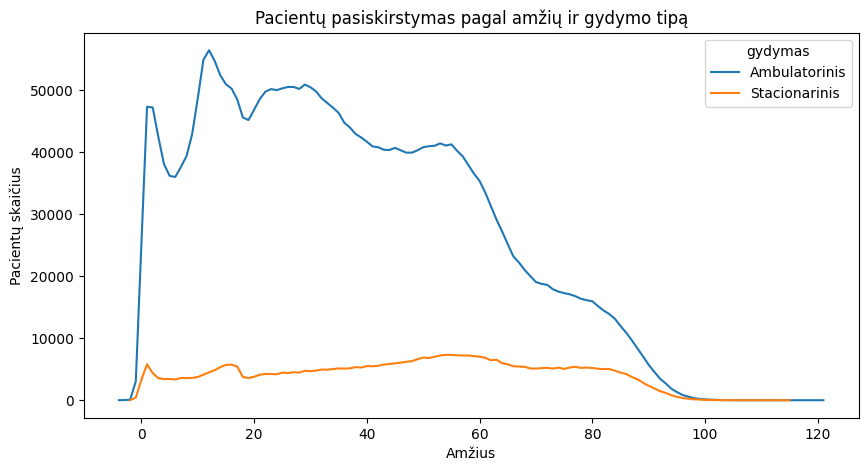

In [42]:
df_for_plots = pacientai_for_check.groupby(['Amžius', 'gydymas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x='Amžius', y='Gimimo data', data=df_for_plots, ax=ax, hue='gydymas')
ax.set_title('Pacientų pasiskirstymas pagal amžių ir gydymo tipą')
ax.set_xlabel('Amžius')
ax.set_ylabel('Pacientų skaičius')
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau yra ambulatorinių pacientų nei stacionarinių
# 2. Didėjant amžiui, ambulatorinių pacientų skaičius mažėja, o stacionarinių didėja

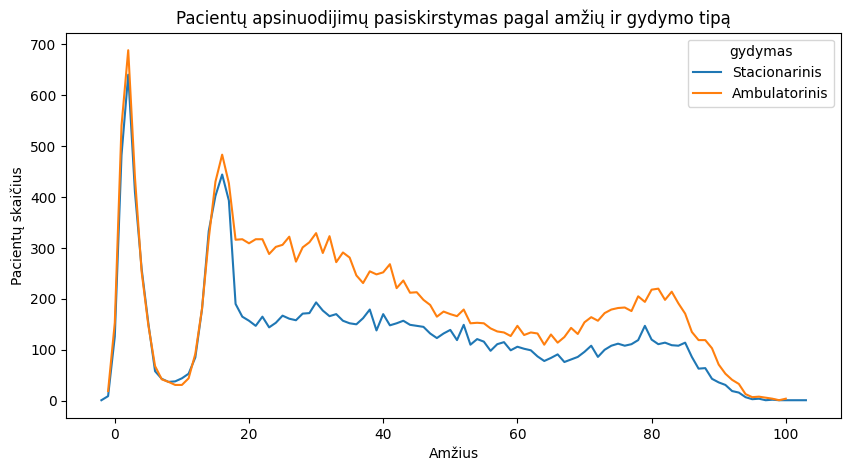

In [43]:
df_for_plots = pacientai_for_check[pacientai_for_check['Rūšis'] == 'Apsinuodijimas'].groupby(['Amžius', 'gydymas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x='Amžius', y='Gimimo data', data=df_for_plots, ax=ax, hue='gydymas')
ax.set_title('Pacientų apsinuodijimų pasiskirstymas pagal amžių ir gydymo tipą')
ax.set_xlabel('Amžius')
ax.set_ylabel('Pacientų skaičius')
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau yra ambulatorinių pacientų nei stacionarinių
# 2. Daugiausiai apsinuodijimų patiria 0-5 metų vaikai ir 15-20 metų paaugliai

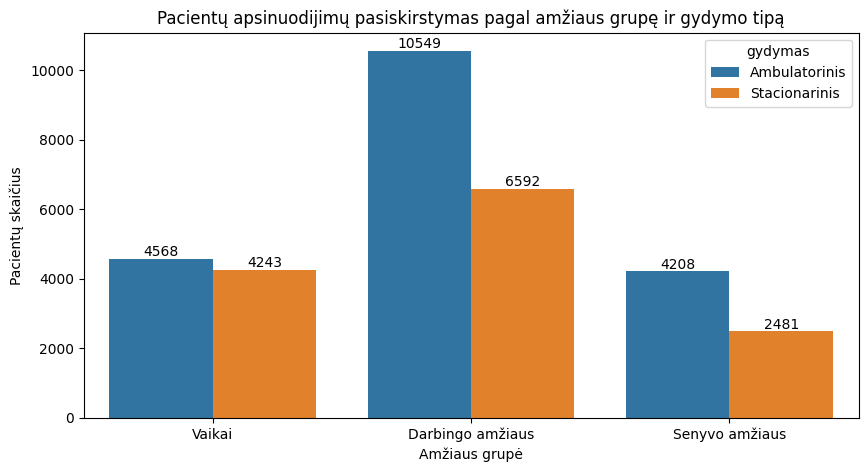

In [48]:
df_for_plots = pacientai_for_check[pacientai_for_check['Rūšis'] == 'Apsinuodijimas'].groupby(['Amžiaus grupė', 'gydymas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='Gimimo data', data=df_for_plots, ax=ax, hue='gydymas')
ax.set_title('Pacientų apsinuodijimų pasiskirstymas pagal amžiaus grupę ir gydymo tipą')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiausiai apsinuodijimų patiria darbingo amžiaus žmonės
# 2. Mažiausiai apsinuodijimų patiria senyvo amžiaus žmonės

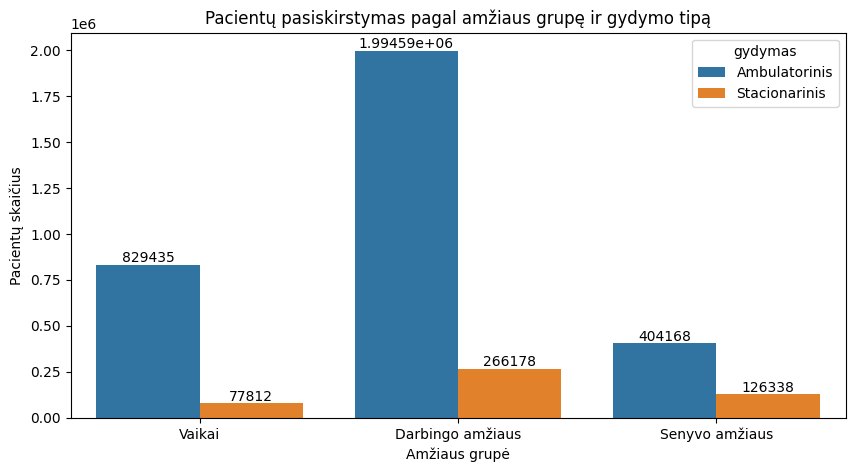

In [49]:
df_for_plots = pacientai_for_check.groupby(['Amžiaus grupė', 'gydymas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='Gimimo data', data=df_for_plots, ax=ax, hue='gydymas')
ax.set_title('Pacientų pasiskirstymas pagal amžiaus grupę ir gydymo tipą')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [50]:
# Pastebejimai
# 1. Daugiausiai traumų patiria darbingo amžiaus žmonės
# 2. Mažiausiai traumų patiria senyvo amžiaus žmonės
# 3. Daugiau yra nesunkių traumų nei sunkių

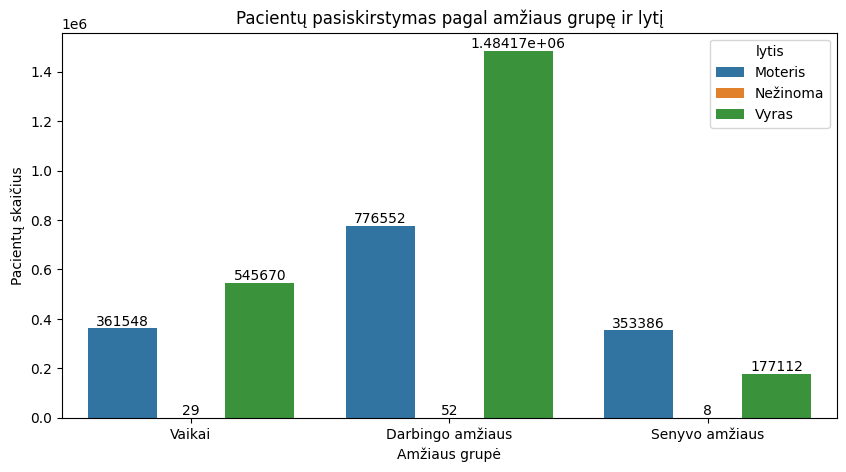

In [51]:
df_for_plots = pacientai_for_check.groupby(['Amžiaus grupė', 'lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='gydymas', data=df_for_plots, ax=ax, hue='lytis')
ax.set_title('Pacientų pasiskirstymas pagal amžiaus grupę ir lytį')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau traumų patiria vyrai nei moterys
# 2. Daugiausiai traumų patiria darbingo amžiaus vyrai
# 3. Mažiausiai traumų patiria senyvo amžiaus vyrai
# 4. Iki senyvo amžiaus moterys patiria mažiau traumų nei vyrai, bet senyvo amžiaus moterys patiria daugiau traumų nei vyrai

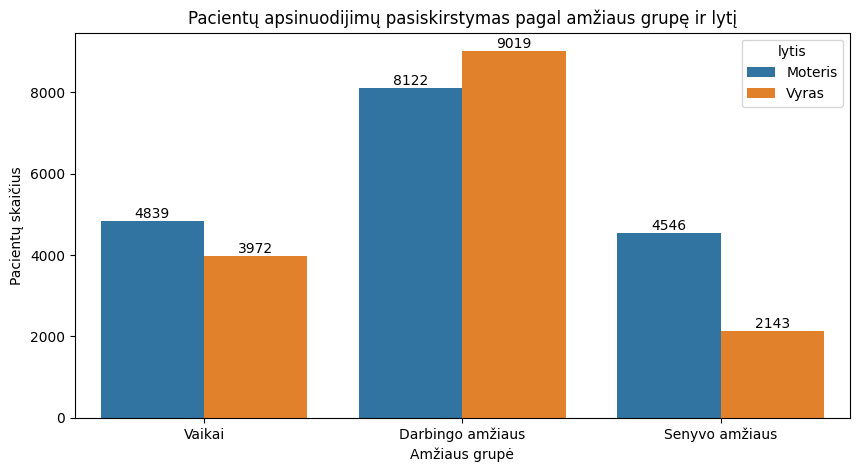

In [52]:
df_for_plots = pacientai_for_check[pacientai_for_check['Rūšis'] == 'Apsinuodijimas'].groupby(['Amžiaus grupė', 'lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='gydymas', data=df_for_plots, ax=ax, hue='lytis')
ax.set_title('Pacientų apsinuodijimų pasiskirstymas pagal amžiaus grupę ir lytį')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [53]:
# Pastebėjimai
# 1. Daugiau apsinuodijimų patiria darbingo amžiaus vyrai
# 2. Mažiausiai apsinuodijimų patiria senyvo amžiaus vyrai

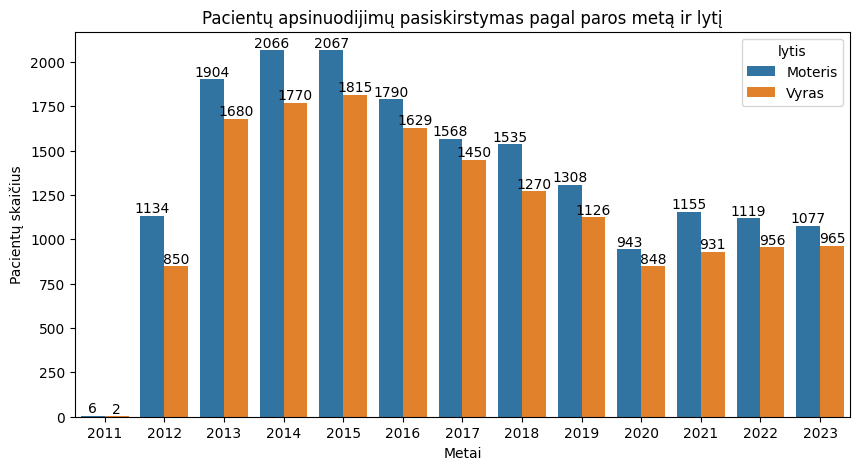

In [72]:
df_for_plots = pacientai_for_check[pacientai_for_check['Rūšis'] == 'Apsinuodijimas'].groupby(['Metai', 'lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Metai', y='gydymas', data=df_for_plots, ax=ax, hue='lytis')
ax.set_title('Pacientų apsinuodijimų pasiskirstymas pagal paros metą ir lytį')
ax.set_xlabel('Metai')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau apsinuodijimų patiria moteys nei vyrai
# 2. Daugiausiai apsinuodijimų patiria 2014-2015 metais

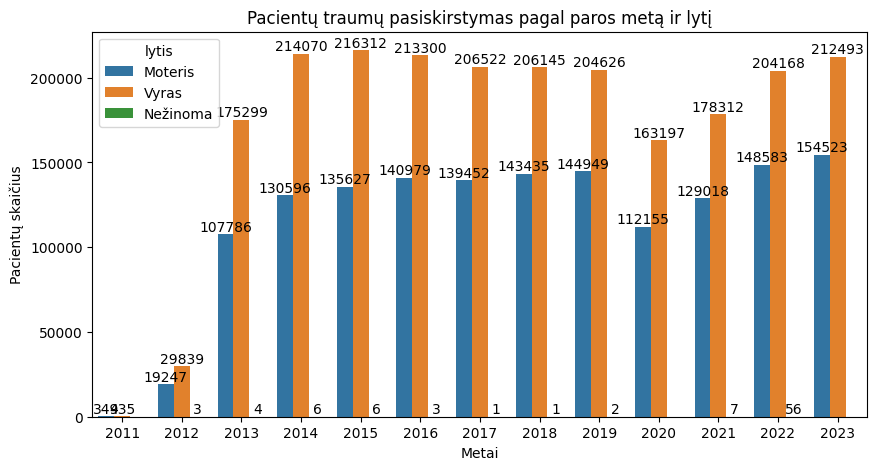

In [73]:
df_for_plots = pacientai_for_check.groupby(['Metai', 'lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Metai', y='gydymas', data=df_for_plots, ax=ax, hue='lytis')
ax.set_title('Pacientų traumų pasiskirstymas pagal paros metą ir lytį')
ax.set_xlabel('Metai')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau traumų patiria vyrai nei moterys
# 2. Daugiausiai traumų patiria 2014-2016 metais

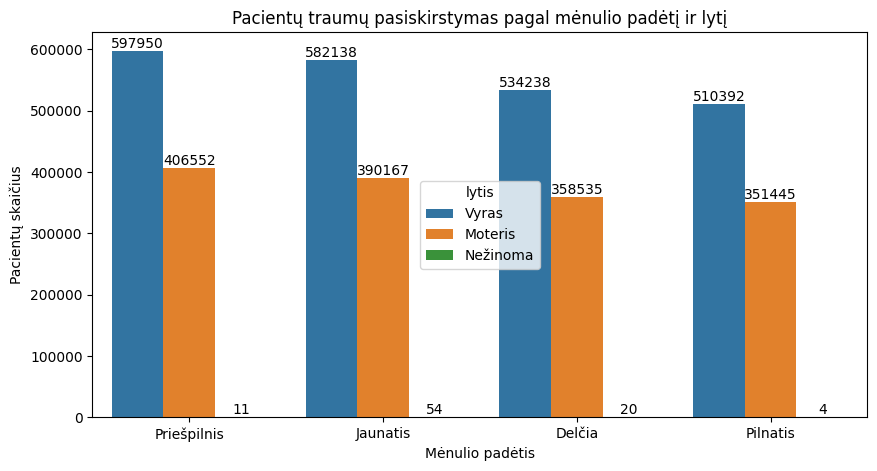

In [181]:
df_for_plots = pacientai_for_check.groupby(['Mėnulio padėtis', 'lytis']).count().reset_index().sort_values(by='gydymas', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Mėnulio padėtis', y='gydymas', data=df_for_plots, ax=ax, hue='lytis')
ax.set_title('Pacientų traumų pasiskirstymas pagal mėnulio padėtį ir lytį')
ax.set_xlabel('Mėnulio padėtis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau traumų patiria vyrai nei moterys
# 2. Daugiausiai traumų patiria jaunatyje

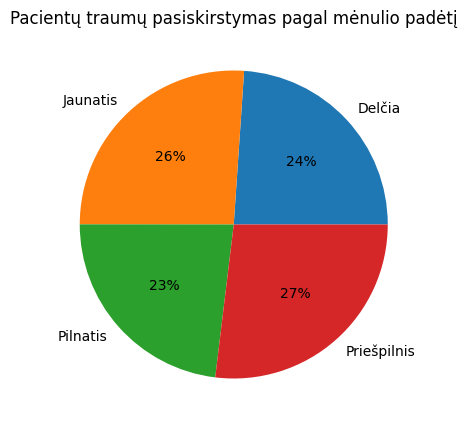

In [182]:
df_for_plots = pacientai_for_check[['Mėnulio padėtis','lytis']].groupby(['Mėnulio padėtis']).count().reset_index()
labels = df_for_plots['Mėnulio padėtis'].to_list()
counts = df_for_plots['lytis'].to_list()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Pacientų traumų pasiskirstymas pagal mėnulio padėtį')
plt.pie(counts, labels=labels, autopct='%.0f%%')
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiausiai traumų patiria jaunatyje

In [204]:
import csv
import os

def add_entry_to_csv(file_path: str, data: dict):
    """
    Prideda įrašą į CSV failą. Jei CSV failas neegzistuoja arba neturi stulpelių, jie sukuriami.

    :param file_path: CSV failo kelias
    :param data: Žodynas su duomenimis, kuriuos reikia įrašyti
    """
    file_exists = os.path.isfile(file_path)
    
    # Atidarome failą su papildymo (`a`) režimu ir užtikriname UTF-8 kodavimą
    with open(file_path, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=data.keys())

        # Jei failo nėra, rašome antraštes
        if not file_exists:
            writer.writeheader()

        # Pridedame naują įrašą
        writer.writerow(data)



In [338]:
import requests
import pandas as pd
from datetime import timedelta, datetime

def get_weather_data(start_date, end_date):
    data = pd.read_csv('weather_data.csv')
    data['date'] = pd.to_datetime(data['date']).dt.date
    maxdate = data['date'].max()
    current_date = maxdate + timedelta(days=1) if maxdate>=start_date else start_date

    while current_date <= end_date:
        try:
            url = f'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/{current_date}'
            print(current_date)
            response = requests.get(url)
            data = response.json()
            # print(data)
            
            for observation in data['observations']:
                weather_data ={}
                weather_data ={
                    'date': observation['observationTimeUtc'],
                    'air_temperature': observation['airTemperature'],
                    'wind_speed': observation['windSpeed'],
                    'total_precipitation': observation['precipitation']
                }
                print(weather_data)
                if weather_data:
                    add_entry_to_csv('weather_data.csv', weather_data)
            current_date += timedelta(days=1)
        except:
            current_date += timedelta(days=1)
            continue
    
    return None

def get_patient_date_range(df):
    min_date = df['Data'].min().date()
    max_date = df['Data'].max().date()
    return min_date, max_date

min_date, max_date = get_patient_date_range(pacientai_for_check)
min_date = datetime(2016, 5, 30).date()
max_date = datetime(2024, 8, 22).date()
print(min_date, max_date)

get_weather_data(min_date, max_date)
weather_df = pd.read_csv('weather_data.csv')
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

2016-05-30 2024-08-22


In [339]:
weather_df = weather_df.groupby('date').mean().reset_index(); weather_df

,date,air_temperature,wind_speed,total_precipitation
0,2015-05-12,12.200000,4.400000,0.000000
1,2015-05-13,5.800000,2.200000,0.000000
2,2015-05-14,5.200000,0.600000,0.000000
3,2015-05-15,4.600000,3.100000,0.000000
4,2015-05-16,4.200000,0.900000,0.000000
...,...,...,...,...
1907,2024-08-18,23.333333,1.404167,0.000000
1908,2024-08-19,22.220833,1.745833,0.166667
1909,2024-08-20,20.554167,1.758333,0.000000
1910,2024-08-21,21.300000,2.070833,0.158333


In [ ]:
pacientai_for_check

In [159]:
ligonines.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_pk', 'istaiga', 'kodas',
       'gyd_lap_pradzia', 'gyd_lap_pabaiga', 'tlk_trauma', 'gydymas',
       'stacionaro_tipas'],
      dtype='object')

In [333]:
import requests
import pandas as pd
from datetime import timedelta, datetime

def write_working_days(start_date, end_date):
    date = pd.read_csv('working_days.csv')
    date['Data'] = pd.to_datetime(date['Data']).dt.date
    maxdate = date['Data'].max()
    current_date = maxdate + timedelta(days=1) if maxdate>=start_date else start_date

    while current_date <= end_date:
        is_working = is_working_day(current_date)
        data = {'Data': current_date, 'Darbo diena': is_working}
        add_entry_to_csv('working_days.csv', data)
        current_date += timedelta(days=1)
        continue
    return None

def get_patient_date_range(df):
    min_date = df['Data'].min().date()
    max_date = df['Data'].max().date()
    return min_date, max_date

min_date, max_date = get_patient_date_range(pacientai_for_check)
max_date = datetime(2024, 8, 22).date()

write_working_days(min_date, max_date)

In [326]:
working_days = pd.read_csv('working_days.csv')
working_days['Data'] = pd.to_datetime(working_days['Data']).dt.date

In [359]:
holidays = pd.read_csv('holidays.csv')
holidays['Data'] = pd.to_datetime(holidays['Data']).dt.date

In [360]:
ligonines = ligonines_check
ligonines = ligonines[['gyd_lap_pradzia', 'gyd_lap_pabaiga', 'gydymas', 'tlk_trauma', 'stacionaro_tipas']]
ligonines['Data'] = pd.to_datetime(ligonines['gyd_lap_pradzia'])
ligonines['Metai'] = ligonines['Data'].dt.year
ligonines['Mėnuo'] = ligonines['Data'].dt.month
ligonines['Data'] = ligonines['Data'].dt.date
ligonines['Trauma'] = ligonines['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['TLK-10-AM Kodo pavadinimas'])
ligonines['Skyrius'] = ligonines['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['Skyriaus pavadinimas'])
ligonines['Poskyris'] = ligonines['tlk_trauma'].map(klasifikatoriai.set_index('TLK-10-AM Kodas')['Poskyrio pavadinimas'])
ligonines['Mėnulio padėtis'] = ligonines['Data'].map(mėnulis_for_check.set_index('Data')['Mėnulio padėtis'])
ligonines['Temperatūra'] = ligonines['Data'].map(weather_df.set_index('date')['air_temperature'])
ligonines['Vėjo greitis'] = ligonines['Data'].map(weather_df.set_index('date')['wind_speed'])
ligonines['Krituliai'] = ligonines['Data'].map(weather_df.set_index('date')['total_precipitation'])
ligonines['Rūšis'] = ligonines['Trauma'].apply(apsinuod)
ligonines['Darbo diena'] = ligonines['Data'].map(working_days.set_index('Data')['Darbo diena'])
ligonines['Dienos tipas'] = ligonines['Data'].map(holidays.set_index('Data')['Dienos tipas'])

In [328]:
ligonines

,gyd_lap_pradzia,gyd_lap_pabaiga,gydymas,tlk_trauma,stacionaro_tipas,Data,Metai,Mėnuo,Trauma,Skyrius,Poskyris,Mėnulio padėtis,Temperatūra,Vėjo greitis,Krituliai,Rūšis,Darbo diena
0,2017-09-16T14:49:00,2017-09-19T11:45:00,Ambulatorinis,S30.0,NaN,2017-09-16,2017,9,Nugaros apatinės dalies ir dubens sumušimas,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...","PILVO, JUOSMENS, STUBURO JUOSMENINĖS DALIES IR...",Delčia,NaN,NaN,NaN,Trauma,False
1,2016-10-07T09:37:00,2016-10-07T10:00:00,Ambulatorinis,T15.0,NaN,2016-10-07,2016,10,Ragenos svetimkūnis,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...","SVETIMKŪNIŲ, PATEKUSIŲ PRO NATŪRALIAS ANGAS, P...",Jaunatis,3.9,1.6,0.0,Trauma,True
2,2023-05-03T19:40:00,2023-05-03T20:30:00,Ambulatorinis,S71.1,NaN,2023-05-03,2023,5,Šlaunies žaizda,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",KLUBO IR ŠLAUNIES SUŽALOJIMAI,Priešpilnis,NaN,NaN,NaN,Trauma,True
3,2019-03-26T12:28:00,2019-03-29T10:00:00,Stacionarinis,S80.1,A,2019-03-26,2019,3,Kitų ir nepatikslintų blauzdos sričių sumušimas,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",KELIO IR BLAUZDOS SUŽALOJIMAI,Pilnatis,NaN,NaN,NaN,Trauma,True
4,2023-12-20T09:41:00,2023-12-20T10:22:00,Ambulatorinis,S60.2,NaN,2023-12-20,2023,12,Kitų riešo ir plaštakos dalių sumušimas,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,Priešpilnis,NaN,NaN,NaN,Trauma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730803,2020-10-05T00:14:00,2020-10-05T00:54:00,Ambulatorinis,T74.0,NaN,2020-10-05,2020,10,Nepriežiūra ar palikimas,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",KITI IR NEPATIKSLINTI IŠORINIŲ PRIEŽASČIŲ POVE...,Pilnatis,NaN,NaN,NaN,Trauma,True
3730804,2021-06-16T13:41:00,2021-06-16T15:14:00,Ambulatorinis,S52.50,NaN,2021-06-16,2021,6,"Stipinkaulio apatinės dalies lūžis, nepatiksli...","SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",ALKŪNĖS IR DILBIO SUŽALOJIMAI,Jaunatis,NaN,NaN,NaN,Trauma,True
3730805,2021-12-07T18:45:00,2021-12-07T20:00:00,Ambulatorinis,S91.3,NaN,2021-12-07,2021,12,Kitų pėdos dalių žaizda,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",ČIURNOS IR PĖDOS SUŽALOJIMAI,Jaunatis,-12.1,1.0,0.0,Trauma,True
3730806,2017-06-25T22:20:00,2017-06-25T22:57:00,Ambulatorinis,S62.21,NaN,2017-06-25,2017,6,Pirmojo delnakaulio pamato lūžis,"SUŽALOJIMAI, APSINUODIJIMAI IR TAM TIKRI IŠORI...",RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,Jaunatis,NaN,NaN,NaN,Trauma,False


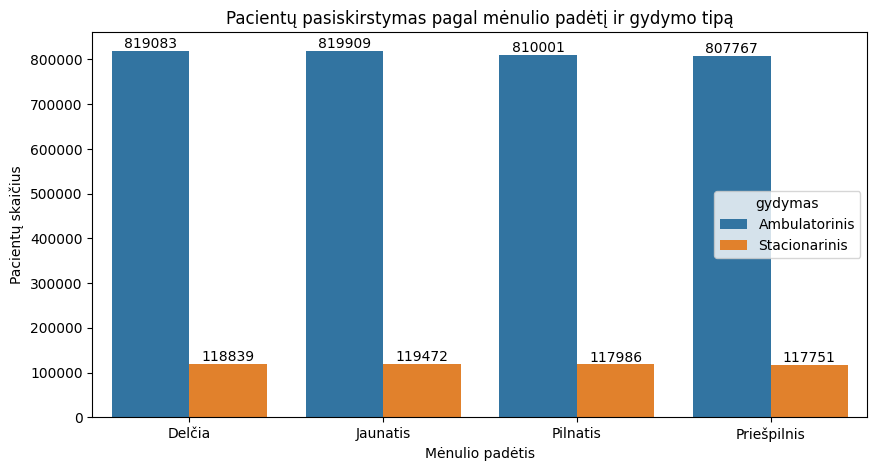

In [253]:
df_for_plots = ligonines.groupby(['Mėnulio padėtis', 'gydymas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Mėnulio padėtis', y='Data', data=df_for_plots, ax=ax, hue='gydymas')
ax.set_title('Pacientų pasiskirstymas pagal mėnulio padėtį ir gydymo tipą')
ax.set_xlabel('Mėnulio padėtis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

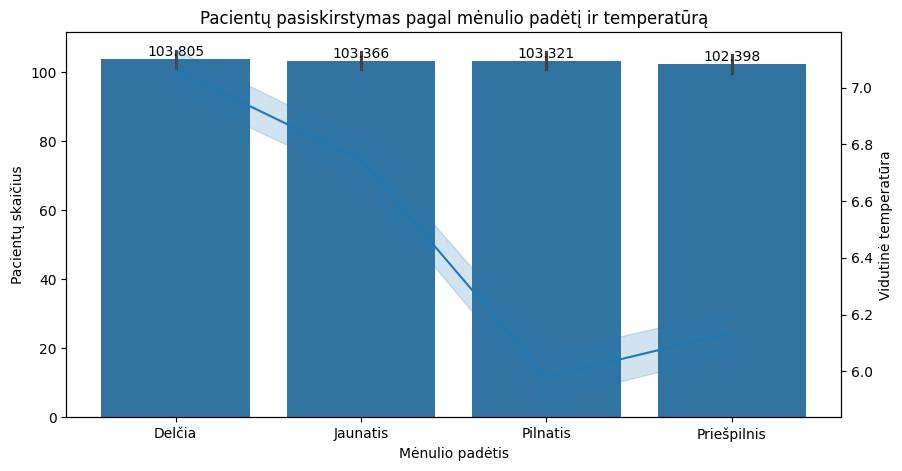

In [294]:
ligonines2 = ligonines.dropna()
ligonines2['Data'] = pd.to_datetime(ligonines2['gyd_lap_pradzia']).dt.normalize()
ligonines['Data'] = pd.to_datetime(ligonines['gyd_lap_pradzia']).dt.normalize()
df_for_plots = ligonines2.groupby(['Mėnulio padėtis', 'Data']).count().reset_index()
df_for_plots2 = ligonines2[['Mėnulio padėtis','Temperatūra']].groupby('Mėnulio padėtis').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Mėnulio padėtis', y='gydymas', data=df_for_plots, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='Mėnulio padėtis', y='Temperatūra', data=ligonines2, ax=ax2)
ax.set_title('Pacientų pasiskirstymas pagal mėnulio padėtį ir temperatūrą')
ax.set_xlabel('Mėnulio padėtis')
ax.set_ylabel('Pacientų skaičius')
ax2.set_ylabel('Vidutinė temperatūra')
for container in ax.containers:
    ax.bar_label(container)
plt.show()



In [ ]:
# Pastebėjimai
# 1. Pacientų kiekis nepriklauso nuo mėnulio padėties
# 2. Pacientų kiekis nepriklauso nuo temperatūros

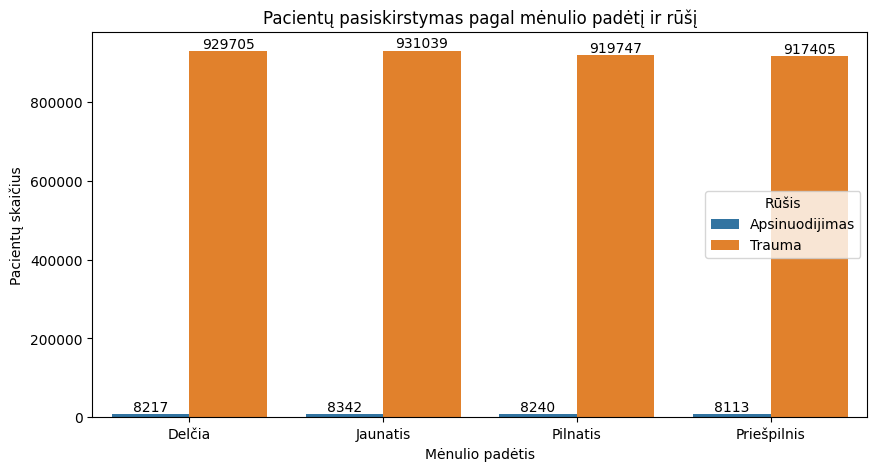

In [303]:
df_for_plots = ligonines.groupby(['Mėnulio padėtis', 'Rūšis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Mėnulio padėtis', y='Data', data=df_for_plots, ax=ax, hue='Rūšis')
ax.set_title('Pacientų pasiskirstymas pagal mėnulio padėtį ir rūšį')
ax.set_xlabel('Mėnulio padėtis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Traumų kiekis nepriklauso nuo mėnulio padėties
# 2. Apsinuodijimų kiekis nepriklauso nuo mėnulio padėties

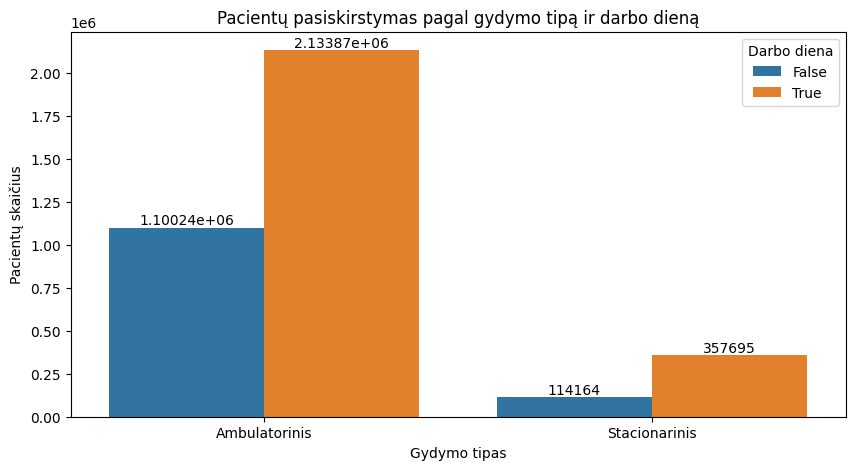

In [329]:
df_for_plots = ligonines.groupby(['gydymas', 'Darbo diena']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='gydymas', y='Data', data=df_for_plots, ax=ax, hue='Darbo diena')
ax.set_title('Pacientų pasiskirstymas pagal gydymo tipą ir darbo dieną')
ax.set_xlabel('Gydymo tipas')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau pacientų gydoma darbo dienomis nei ne darbo dienomis
# 2. Daugiau pacientų gydoma ambulatoriškai nei stacionariškai

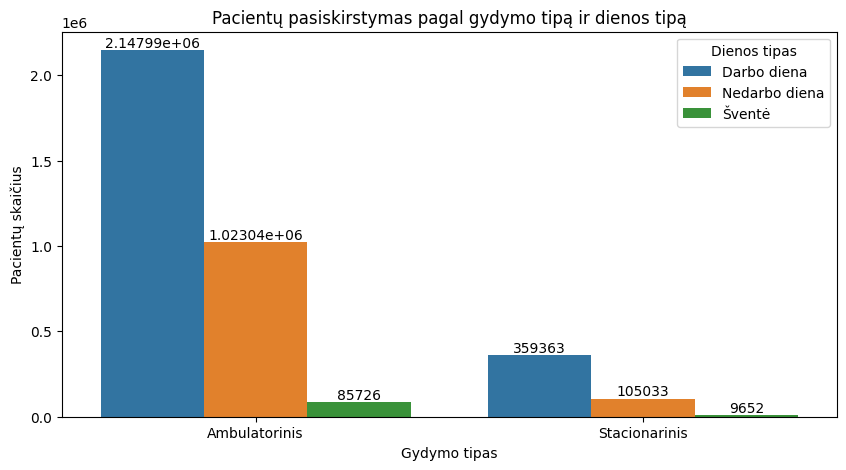

In [361]:
df_for_plots = ligonines.groupby(['gydymas', 'Dienos tipas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='gydymas', y='Data', data=df_for_plots, ax=ax, hue='Dienos tipas')
ax.set_title('Pacientų pasiskirstymas pagal gydymo tipą ir dienos tipą')
ax.set_xlabel('Gydymo tipas')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebejimai
# 1. Daugiau pacientų gydoma darbo dienomis nei ne darbo dienomis ar švenčių dienomis
# 2. Daugiau pacientų gydoma ambulatoriškai nei stacionariškai

In [357]:
import requests
from bs4 import BeautifulSoup

def is_holiday(date):
    weekday = date.weekday()
    url = f'https://day.lt/diena/{date.year}.{date.month:02d}.{date.day:02d}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    


    if weekday > 4:
        return "Nedarbo diena"
    else:
        try:
            soup.find('div', {'class': 'text-center mb-8'}).find('a')['style']
            return "Šventė"
        except:
            return "Darbo diena"

In [358]:
import requests
import pandas as pd
from datetime import timedelta, datetime

def write_holidays(start_date, end_date):
    current_date = start_date

    while current_date <= end_date:
        is_working = is_holiday(current_date)
        data = {'Data': current_date, 'Dienos tipas': is_working}
        add_entry_to_csv('holidays.csv', data)
        current_date += timedelta(days=1)
        continue
    return None

min_date = datetime(2002, 1, 1).date()
max_date = datetime(2024, 8, 22).date()

write_holidays(min_date, max_date)

In [362]:
holidays = pd.read_csv('holidays.csv')
holidays['Data'] = pd.to_datetime(holidays['Data']).dt.date

In [ ]:
# – PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
# – Policijos
# iškvietimai. Ar
# iškvietimų dažnis/kiekis priklauso nuo paros,
# metų, darbo dienų/švenčių/išeiginių, mėnulio
# fazės, švenčių/laisvadienių?
# Mėnulio
# fazės turi būti pasiekiamos per http užklausas – iš esmės
# pasinaudojate web scrapingu, kad gautumėte norimą informaciją.

In [363]:
ivykiai['iskvietimo_laikas'] = pd.to_datetime(ivykiai['iskvietimo_laikas'])
ivykiai['Paros metas'] = pd.cut(ivykiai['iskvietimo_laikas'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Naktis', 'Rytas', 'Diena', 'Vakaras'])
ivykiai['Mėnulio padėtis'] = ivykiai['iskvietimo_laikas'].dt.date.map(mėnulis_for_check.set_index('Data')['Mėnulio padėtis'])
ivykiai['Darbo diena'] = ivykiai['iskvietimo_laikas'].dt.date.map(working_days.set_index('Data')['Darbo diena'])
ivykiai['Metai'] = ivykiai['iskvietimo_laikas'].dt.year
ivykiai['Dienos tipas'] = ivykiai['iskvietimo_laikas'].dt.date.map(holidays.set_index('Data')['Dienos tipas'])

In [341]:
ivykiai

,_type,_id,_revision,_page.next,korteles_id,susieta_su_kortele,korteles_data,ivykio_aprasymas_lt,administracinis_vienetas,pagd_padalinys,...,ivykio_priezastis,isgelbeta_zmoniu,zuvo_zmoniu,zuvo_nepilnameciu,traumuota_zmoniu,sunaikinta_statiniu,ivykio_svarba,Paros metas,Mėnulio padėtis,Darbo diena
0,datasets/gov/pagd/ivykiu_suvestine/Ivykis,91a340a1-720c-4bbe-a4bf-3c4b57f3d605,ecfe67b8-09f8-430e-b717-f2bd0f7875ac,NaN,00000046081b1e4,NaN,2017-04-22,Cenzūruota,Utenos r. sav.,Utenos r. sav.,...,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0,Diena,Delčia,False
1,datasets/gov/pagd/ivykiu_suvestine/Ivykis,c2dcca1f-24fe-4a07-8263-fd2acfc37ba8,2345639d-0392-43c1-adff-2bdc3d0f9e8e,NaN,000007412530a4b,NaN,2004-07-31,Cenzūruota,Mažeikių r. sav.,Mažeikių r. sav.,...,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
2,datasets/gov/pagd/ivykiu_suvestine/Ivykis,3fb70929-ab9b-47a1-abcc-3240e86680f4,8519f9f8-f998-4bd4-a649-4a3162947115,NaN,00003279c749c51,NaN,2021-03-19,Cenzūruota,Visagino sav.,Visagino sav.,...,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0,Rytas,Jaunatis,True
3,datasets/gov/pagd/ivykiu_suvestine/Ivykis,641e6c37-339d-424c-af98-da502b63d1e6,abe4fe27-9d2c-4ad2-b578-06c997b47327,NaN,000059f729c2750,NaN,2010-04-25,Cenzūruota,Kėdainių r. sav.,Kėdainių r. sav.,...,Neatsargus žmogaus elgesys,0.0,0.0,0.0,0.0,0.0,0,Diena,NaN,NaN
4,datasets/gov/pagd/ivykiu_suvestine/Ivykis,9be45128-1f8c-4630-911a-ddfb2b0baaa7,118bc7cb-3ab5-4687-95ff-8bb86a5456a8,NaN,000065d3a70df7e,NaN,2004-05-03,Cenzūruota,Mažeikių r. sav.,Mažeikių r. sav.,...,Kitos priežastys,0.0,0.0,0.0,0.0,0.0,0,Rytas,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700068,datasets/gov/pagd/ivykiu_suvestine/Ivykis,480aebde-cd81-4f20-9c20-2f927fadb0f0,418bdaff-3a1c-4b24-a0a2-534529c285b7,NaN,ffff2a093805280,NaN,2008-07-21,Cenzūruota,Jurbarko r. sav.,Jurbarko r. sav.,...,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
700069,datasets/gov/pagd/ivykiu_suvestine/Ivykis,ea2b1a8d-1945-4e37-a9cf-7482f841c8f1,95f2a024-dc19-4baf-b6ff-e6567869bd5e,NaN,ffff460a5870e4d,NaN,2008-04-04,Cenzūruota,Elektrėnų sav.,Elektrėnų sav.,...,"Žolės, ražienų, augalininkystės atliekų deginimas",0.0,0.0,0.0,0.0,0.0,0,Vakaras,NaN,NaN
700070,datasets/gov/pagd/ivykiu_suvestine/Ivykis,6239b9cd-cd0f-47ad-aec1-a947dcf19d15,90da45ef-2d94-4882-bc8e-f43441c6f6f8,NaN,ffff976d461e4ea,NaN,2017-10-07,Cenzūruota,Kėdainių r. sav.,Kėdainių r. sav.,...,Neatsargus žmogaus elgesys,0.0,0.0,0.0,0.0,0.0,0,Vakaras,Pilnatis,False
700071,datasets/gov/pagd/ivykiu_suvestine/Ivykis,0212daf5-7706-44ff-ba7e-8892eb152db9,b702c158-10de-4ea7-a144-35c397398af0,NaN,ffffc766195570a,NaN,2007-03-01,Cenzūruota,Šiaulių r. sav.,Šiaulių r. sav.,...,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN


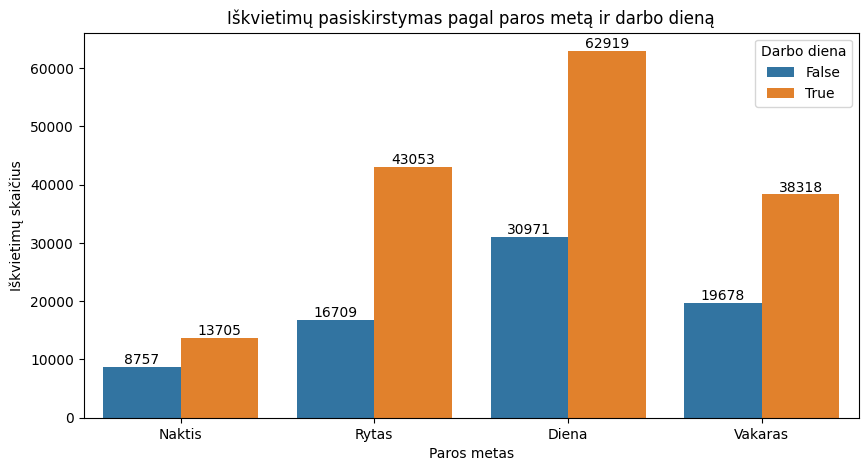

In [348]:
df_for_plots = ivykiai[['Paros metas','Darbo diena', 'korteles_id']].dropna().groupby(['Paros metas', 'Darbo diena']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Paros metas', y='korteles_id', data=df_for_plots, ax=ax, hue='Darbo diena')
ax.set_title('Iškvietimų pasiskirstymas pagal paros metą ir darbo dieną')
ax.set_xlabel('Paros metas')
ax.set_ylabel('Iškvietimų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau iškvietimų yra dieną nei naktį
# 2. Daugiau iškvietimų yra darbo dienomis nei ne darbo dienomis
# 3. Mažiausiai iškvietimų yra naktį ne darbo dienomis

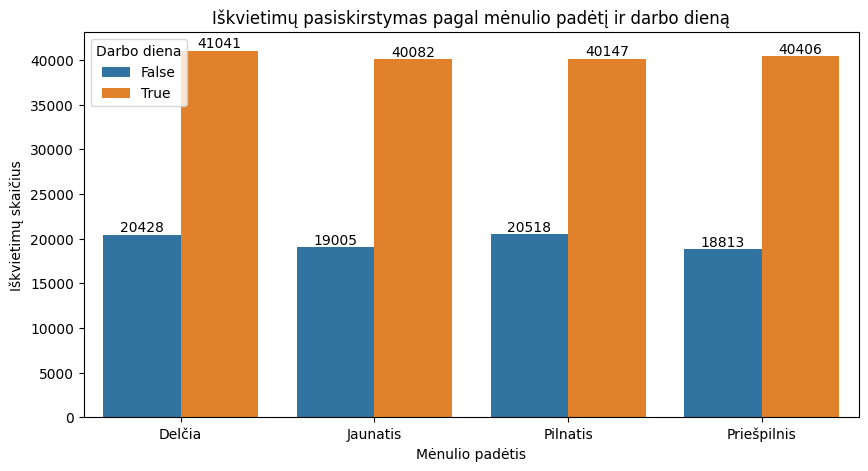

In [350]:
df_for_plots = ivykiai[['Mėnulio padėtis','Darbo diena', 'korteles_id']].dropna().groupby(['Mėnulio padėtis', 'Darbo diena']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Mėnulio padėtis', y='korteles_id', data=df_for_plots, ax=ax, hue='Darbo diena')
ax.set_title('Iškvietimų pasiskirstymas pagal mėnulio padėtį ir darbo dieną')
ax.set_xlabel('Mėnulio padėtis')
ax.set_ylabel('Iškvietimų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Iškvietimai mažai priklauso nuo mėnulio padėties
# 2. Daugiau iškvietimų yra darbo dienomis nei ne darbo dienomis

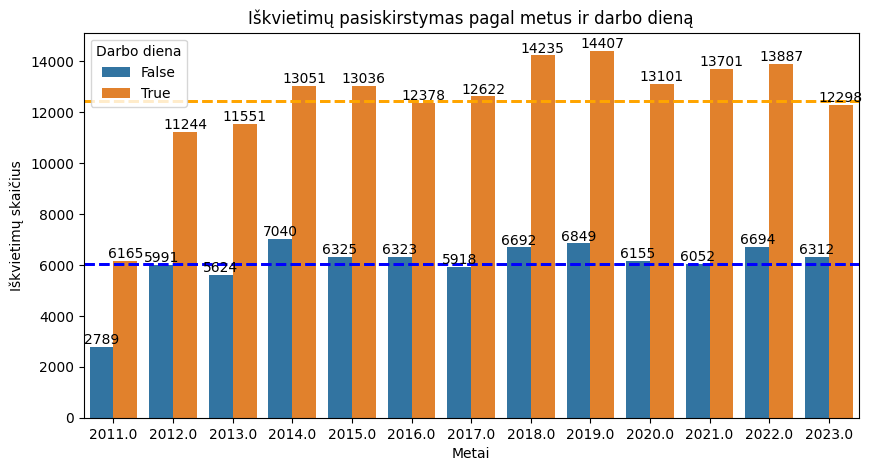

In [356]:
df_for_plots = ivykiai[['Metai','Darbo diena', 'korteles_id']].dropna().groupby(['Metai', 'Darbo diena']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Metai', y='korteles_id', data=df_for_plots, ax=ax, hue='Darbo diena')
ax.add_line(plt.axhline(y=df_for_plots[df_for_plots['Darbo diena'] == True]['korteles_id'].mean(), color='orange', linestyle='--', label='Vidurkis', linewidth=2))
ax.add_line(plt.axhline(y=df_for_plots[df_for_plots['Darbo diena'] == False]['korteles_id'].mean(), color='b', linestyle='--', label='Vidurkis', linewidth=2))
ax.set_title('Iškvietimų pasiskirstymas pagal metus ir darbo dieną')
ax.set_xlabel('Metai')
ax.set_ylabel('Iškvietimų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai
# 1. Iškvietimai mažai priklauso nuo metų
# 2. Daugiau iškvietimų yra darbo dienomis nei ne darbo dienomis
# 3. Daugiausiai iškvietimų buvo 2018-2019 metais

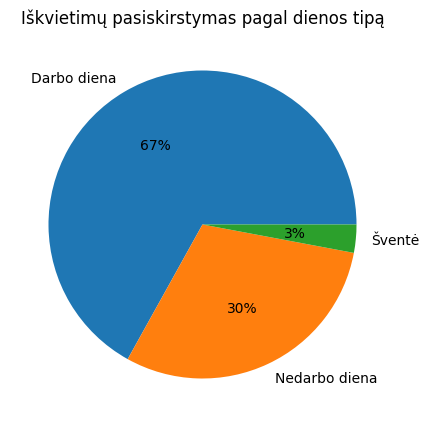

In [364]:
df_for_plots = ivykiai[['Dienos tipas', 'korteles_id']].dropna().groupby(['Dienos tipas']).count().reset_index()
labels = df_for_plots['Dienos tipas'].to_list()
counts = df_for_plots['korteles_id'].to_list()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Iškvietimų pasiskirstymas pagal dienos tipą')
plt.pie(counts, labels=labels, autopct='%.0f%%')
plt.show()

In [ ]:
# Pastebėjimai
# 1. Daugiau iškvietimų yra darbo dienomis nei ne darbo dienomis ar švenčių dienomis
# 2. Mažiausiai iškvietimų yra švenčių dienomis